In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from google.colab import files

from PIL import Image, ImageDraw, ImageFilter

In [ ]:
from scipy import ndimage

In [ ]:
file = files.upload()

Saving images.jpg to images (1).jpg


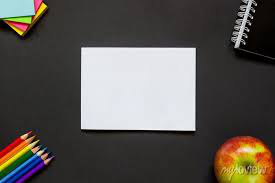

In [ ]:
img_cat = Image.open('images.jpg')
img_cat

In [ ]:
pix = img_cat.load()
data = np.array([[int((pix[x, y][0] + pix[x, y][1] + pix[x, y][2]) / 3) for x in range(img_cat.size[0])] for y in range(img_cat.size[1])])
data

array([[205, 205, 205, ...,  13,  13,  13],
       [205, 205, 205, ...,  11,  11,  11],
       [205, 205, 205, ...,   8,   8,   8],
       ...,
       [103, 134, 144, ...,  38,  26,  18],
       [163, 140, 112, ...,  34,  22,  16],
       [146, 109,  78, ...,  32,  21,  15]])

In [ ]:
k = 1/9 * np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
k

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

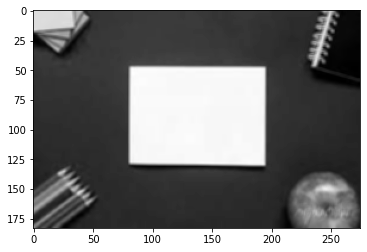

In [ ]:
plt.gray()
res = ndimage.convolve(data, k)
plt.imshow(res)

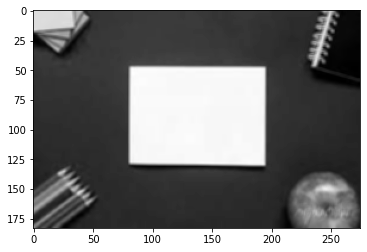

In [ ]:
#res это нумпай массив, убеждаемся в этому с помощью тайп(рес) потом преобразуем его в image, чтобы работать с библиотекой pil, в ресс сохраняем нумпай массив которым был рес
#потому что он нам понадобится для вставки в новую картинку
type(res)
ress = res
res = Image.fromarray(np.uint8(res))
plt.imshow(res)

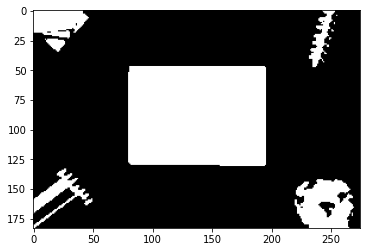

In [ ]:
img_cat_gray = res.convert("L")
img_cat_gray.show()
threshold = 100
img_cat_threshold = img_cat_gray.point(
    lambda x: 255 if x > threshold else 0
)
img_cat_threshold.show()
plt.imshow(img_cat_threshold)

In [ ]:
def erode(cycles, image):
    for _ in range(cycles):
         image = image.filter(ImageFilter.MinFilter(3))
    return image

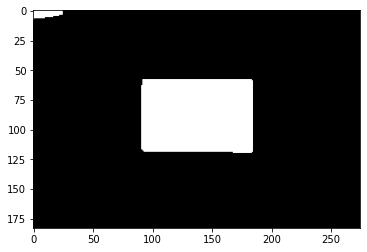

In [ ]:
step_1 = erode(11, img_cat_threshold)
plt.imshow(step_1)

Вставить в другую картинку

In [ ]:
p = Image.new(color=(0, 255, 0), size=(ress.shape[1], ress.shape[0]), mode='RGB')
q = ImageDraw.Draw(p)

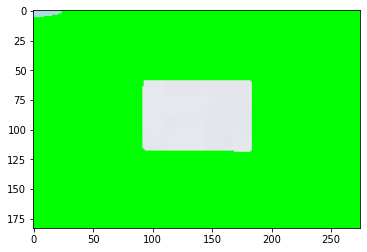

In [ ]:
image = img_cat#исходное изображение
imover = np.asarray(step_1)#преобразует в нумпай массив итоговое изображение степ1
w = np.asarray(image)
for x in range(image.size[1]):
  for y in range(image.size[0]):
    if abs(imover[x,y]):
      q.point((y, x), (w[x,y,0], w[x,y,1], w[x,y,2]))
    # иф проверяет что на степ1 не 0, а 1, и там где 1 то есть белое в эти координаты вставляет в новое изображение вырезанный белый объект

plt.imshow(p)